<h1><center> Data Collection - RIAA!</center></h1>

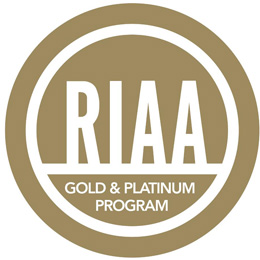

### Who is the RIAA?

> The RIAA (Record Industry Association of America) is a trade organization that has a big influence in the recording Industry and apoints certifications to 'Singles' & 'Albums' based on certain qualifications.

### Sales
 - Gold: 500,000 units
 - Platinum: 1,000,000 units
 - Multi-Platinum: 2,000,000 units (increments of 1,000,000 thereafter)
 - Diamond: 10,000,000 units


#### In order to view musical features that contribute to a song being awarded a certification, I first have to gather songs that have won awards.

In [1]:
import pandas as pd
import requests as re
import json
import numpy as np
import time
from selenium import webdriver
from splinter import Browser
import re

from bs4 import BeautifulSoup as bs

### Selenium 

Since the RIAA website is a continous webpage, I set up Selenium, which is normally used as a portable software-testing framework for web applications; But in this case I will be using it to auto-click the refresh button on the RIAA website in order to web scrape all the songs from 2000 - 2018 that won awards. 

In [4]:
executable_path = {'executable_path':'/Users/benjaminnew/Downloads/chromedriver'}
browse = Browser('chrome', **executable_path
                )

browse.visit('https://www.riaa.com/gold-platinum/?tab_active=default-award&ar=&ti=&lab=&genre=&format=Single&date_option=release&from=2000-01-01&to=2018-09-17&award=&type=&category=&adv=SEARCH#search_section')
next_page = browse.find_by_xpath('//*[@id="loadmore"]/span')
next_page.click()
for i in range(138):
    next_page.click()
    time.sleep(2)

- Collecting all my rows by finding the 'td' tag which represnts each item in every table

In [3]:
song_data = browse.find_by_tag('td')
song_info = [element.value for element in song_data]

- Sending my html through beautiful soup which strips the html text from my file

In [4]:
soup = bs(browse.html, 'lxml')
award_soup = soup.find_all('figure', {'class':'award_block_icon'})
award_soup_string = [str(award) for award in award_soup]

- Appending each aspect of a song into a single list

In [5]:
award =[]
num_1 = 0
for i in range(4142):
    award.append(re.findall(r'\d+', award_soup_string[num_1]))
    num_1+= 1

In [26]:
awards = pd.DataFrame(award , columns = ['award'])

In [7]:
song_info[0:7]

['SHARE',
 'THE CHAINSMOKERS & TRITONAL',
 'UNTIL YOU WERE GONE (FEAT. EMILY WARREN)',
 'September 17, 2018',
 'COLUMBIA',
 'SINGLE\nMORE DETAILS',
 '']

- Seperating each 7 featueres into its own list & appending it to a grand list 
- Sending it to a Data Frame

In [8]:
final_list = []
num = 0
for i in range(4142):
    segment = []
    for i in range(7):
        segment.append(song_info[num])
        num += 1
    final_list.append(segment)  

In [9]:
song_df = pd.DataFrame(final_list, columns = ['share','artist','song','date_certified','label','details','space'])

- Dropping Columns = 'share','details','space' , because they are irrelavant to my needs

In [1]:
song_df.drop(columns = ['share','details','space'] ,inplace = True)

In [29]:
df = pd.concat([song_df ,awards], axis = 1, join = 'outer')

#### Exporting my Data Frame to a csv, in order to use the in next notebook

In [31]:
df.to_csv('../00_Data/df_riaa.csv', index = False)